# Project: Investigate a Dataset (No-Show Medical Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction

### The No-Show appointments Dataset 
> This Dataset collects information of 100k medical appointments made in brazil,The Dataset contains some important personal and medical information about the patients, like the patient id, the appointment id, the patient's age, the patients gender, the scheduled day and appointment day, the patient's medical history(i.e information telling us if the patient is alcoholic, handicap, diabetic, or has hipertension). The dataset contains information telling us if the patient is part of the health scholarship program, and if they recieved a reminder sms. Unfortunately some of the patients weren't able to make it to the appointment and some did. We would like to analyse factors that may affect that outcome.

# Questions to answer
>
>    1. What is the average age of those who show up for a medical appointment and the average age of those who don't show up?
>    2. Does Having an appointment on the same day as the sheduled day influence the rate at which a patient shows up?
>    


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id="wrangling"></a>
# Data Wrangling

In [109]:
#loading data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [110]:
# searching for missing values 
#there are no missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [111]:
df.shape

(110527, 14)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [113]:
# Statistical computations reveals that we have a value in the age column that is -1 this has to be an error value
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [114]:
#Checking out the entire row where "Age" value = -1
df[df["Age"] == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [115]:
#Checking the datatypes of each columns
#The sheduled day and appointment day column needs to be changed to datetime data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [116]:
#Checking for duplicate values
#we have no duplicate values
df.duplicated().sum()

0

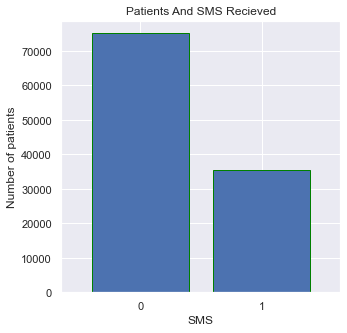

In [164]:
#visualizing how many people recieved an SMS. Where 0 represents those who didn't recieve while 1 are those who received
# from the visualization below we can see that alot of patients didn't recieve an SMS
df["SMS_received"].value_counts().plot.bar(edgecolor="green", figsize=[5,5],rot=0, width=0.8);
plt.xlabel('SMS')
plt.ylabel('Number of patients')
plt.title("Patients And SMS Recieved");


## Conclusion from data Wrangling
- There are no missing values
- The values of the no-show column answers "No" when a patient showed up and "Yes" when they didn't
- column name No-show needs to be changed to No_show for better querying
- Columns need to be converted to appropriate data types e.g ("ScheduledDay", "AppointmentDay") to datetime
- There is an invalid value of the Age column. which is (-1), this value should be dropped 


<a id="cleaning"></a>
# Data cleaning

In [121]:
#converting ["ScheduledDay", "AppointmentDay"] to datetime object
cols=['ScheduledDay','AppointmentDay']
for col in cols:
    df[col] = pd.to_datetime(df[col])

In [122]:
#checking the corected data types
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [123]:
# dropping the columns [Hipertension, Diabetes, Alcoholism, Handcap, AppointmentID] as they wont be used  during the course of this analysis
df.drop(["AppointmentID", "Hipertension", "Diabetes", "Alcoholism", "Handcap"], axis=1, inplace=True)
#checking if the columns has been dropped
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,No


In [124]:
#dropping the row where Age = -1
df.drop(df.query('Age == -1').index,inplace=True)

In [125]:
#checking if the value was dropped 
df[df["Age"] == -1]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No-show


In [126]:
#changing the column name from "no_show" to "showed_up"
df.rename(columns={'No-show':'Showed_up'},inplace=True)

In [127]:
#a function that helps me plot a pie chart
def PieChart(column, Labels, Title):
    sns.set()
    fig = plt.figure(figsize =(5, 7))
    plt.pie(df[column].value_counts().values, labels=Labels, autopct='%1.2f%%')
    plt.legend()
    plt.title(Title)
    plt.show()

In [128]:
#finding out the value of those that showed up and those that didn't
value = df['Showed_up'].value_counts()
value

No     88207
Yes    22319
Name: Showed_up, dtype: int64

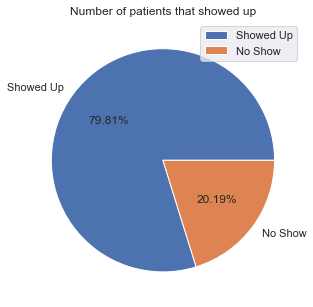

In [129]:
# visualizing the above calculations
PieChart(column='Showed_up', Labels=['Showed Up', 'No Show'], Title='Number of patients that showed up')

In [130]:
# I want the new showed_up column to answer "1" if the patient showed up and "0" if they didn't
for i,v in df.iterrows():
    if v['Showed_up']=='Yes':
        df.loc[i,'Showed_up']= 0
    else:
        df.loc[i,'Showed_up']= 1

In [87]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,Showed_up
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,1


In [23]:
# changing the datatype of showed_up column to integer:
df['Showed_up']= df['Showed_up'].astype('int')

#checking the change
df['Showed_up'].dtype

dtype('int32')

In [24]:
#The statistical computation of the "showed_up" column shows that the data type has been changed to integer
df.describe()

,PatientId,Age,Scholarship,SMS_received,Showed_up
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,38.138073,0.098266,0.321026,0.798067
std,2.560949e+14,21.909763,0.297675,0.466873,0.401444
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,20.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,37.823423,0.000000,0.000000,1.000000
75%,9.439172e+13,55.000000,0.000000,1.000000,1.000000
max,9.999816e+14,90.000000,1.000000,1.000000,1.000000


<a id="eda"></a>
# Exploratory Data Analysis

## Research Question 1: What is the average age of those who show up for a medical appointment and the average age of those who don't show up?

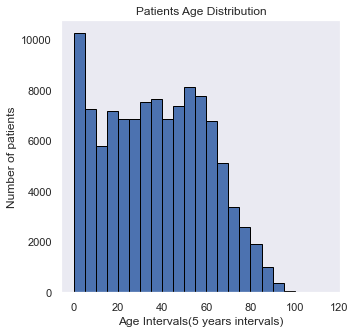

In [150]:
#visualising the age column to get an idea of the ages of most of the patients
# from the visualisation below we can see that most patient are in th
#intervals for age (say every 5 years) 
bins = np.arange(0,df["Age"].max() + 5,5)

#histogram for age
df["Age"].hist(grid= False, bins = bins, edgecolor= "black",figsize= [5,5]);
plt.xlabel('Age(5 years intervals)')
plt.ylabel('Number of patients')
plt.title("Patients Age Distribution");

In [132]:
#let's get the average age of patients who showed up and those who didn't
#the average age of those who showed up is 37 years and those who didn't is 34 years
average_age= df.groupby('Showed_up')['Age'].mean()
print(average_age)

Showed_up
0    34.317667
1    37.790504
Name: Age, dtype: float64


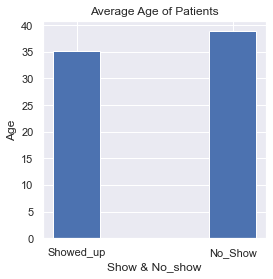

In [113]:
# Visualizing the average age of patients who showed up for an appointment and average age of those who didn't show up:
# The difference between the two is minimal and no prediction can be done from the result below
x=[1,2]
y=average_age.values
fig=plt.figure(figsize=(4,4))
plt.bar(x,y,width=0.3)
label=['Showed_up','No_Show']
plt.xticks(x,label)
plt.xlabel('Show & No_show')
plt.ylabel('Age')
plt.title('Average Age of Patients');


## Research Question Three: Does Having an appointment on the same day as the sheduled day influence the rate at which a patient shows up?


In [134]:
#creating a variable where appointment day is equal to scheduled day
df["same_day"] = (df["ScheduledDay"].dt.date == df["AppointmentDay"].dt.date ).astype(int).map({0:"Different Day", 1:"Same Day"})

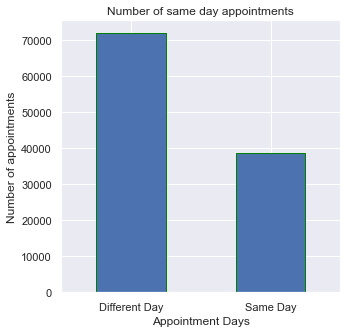

In [158]:
#The visualization below shows us that most of the medical appointment had different schedule and appointment day
df["same_day"].value_counts().plot.bar(edgecolor="green", figsize=[5,5], rot=0, width=0.5, title="Number of same day appointments");
plt.xlabel('Appointment Days')
plt.ylabel('Number of appointments');

In [138]:
#let's get the average number of patients that showed up for the medical appointment when the sheduled and appointment day was the same
#and the average of those who showed up when the appointment day was different from the sheduled day
#from the calculations below we can see that most patients are more likely to show up when appointment day is same as the sheduled day
prop_same_day = df[df['ScheduledDay'].dt.date == df['AppointmentDay'].dt.date]['Showed_up'].mean()
print(prop_same_day)

prop_diff_day = df[df['ScheduledDay'].dt.date != df['AppointmentDay'].dt.date]['Showed_up'].mean()
print(prop_diff_day)

0.9535293812561589
0.7147601578567061


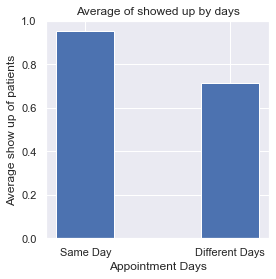

In [169]:
# visualizing the average number of patients who showed up when appointment day was same as scheduled day and the average 
#of those who showed up when the appointment day was different from the sheduled day:
# The Bar chart above gives a better understanding and shows how patients are more likely to show up when appointment day is same as the sheduled day
x=[1,2]
y=[prop_same_day,prop_diff_day]
plt.figure(figsize=(4,4))
plt.bar(x,y,width=0.4)
plt.xticks(x,['Same Day', 'Different Days']);
plt.xlabel('Appointment Days')
plt.ylabel('Average show up of patients')
plt.title('Average of showed up by days');


<a id="conclusions"></a>
# Conclusion
My analysis was aimed at understanding factors that could affect patients who show up for a medical appointment, and those who don't. I made my first analyzation based on the average age of those who didn't show up and the average age of those who did show up, I could not find a significant diffrence between the average age of patients who showed up for the appointment, and those who didn't, as the difference between the two was minimal. I was however able to find out that most patients whose appointment day is same as the sheduled day are mostlikely to show up for a medical appointment.

# Limitations
In the first section: Although I was not able to find a correlation between the age and the likelyness of a patient to show up for an appointment or not show up, it would be good to know  more about the patients with ages < 1

In the second section: Although I was able to find out that most patient with appointment day same as sheduled day are mostlikey going to show up for an appointment, there were some appointment days that were before the sheduled days, it would be good to know more about what led to that occurance.


 